In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Data Cleaning & Preprocessing**

In [ ]:
# load dataset
df = pd.read_csv('dataset.csv')
print('Dataset loaded successfully!')

Dataset loaded successfully!


In [ ]:
# first few observations
df.head()

,Time,Open,High,Low,Last,Change,%Chg,Volume
0,07/01/2024,5471.08,5479.55,5446.53,5475.09,14.61,+0.27%,0.0
1,06/28/2024,5488.48,5523.41,5451.12,5460.48,-22.39,-0.41%,0.0
2,06/27/2024,5473.59,5490.81,5467.54,5482.87,4.97,+0.09%,0.0
3,06/26/2024,5460.71,5483.14,5451.87,5477.90,8.60,+0.16%,0.0
4,06/25/2024,5460.73,5472.88,5446.56,5469.30,21.43,+0.39%,0.0


In [ ]:
df.tail()

,Time,Open,High,Low,Last,Change,%Chg,Volume
874,01/07/2021,3764.71,3811.55,3764.71,3803.79,55.65,+1.48%,0.0
875,01/06/2021,3712.20,3783.04,3705.34,3748.14,21.28,+0.57%,0.0
876,01/05/2021,3698.02,3737.83,3695.08,3726.86,26.21,+0.71%,0.0
877,01/04/2021,3764.61,3769.44,3662.71,3700.65,-55.42,-1.48%,0.0
878,Downloaded from Barchart.com as of 07-30-2024 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# delete the last observation
df = df.iloc[:-1]
df.tail()

,Time,Open,High,Low,Last,Change,%Chg,Volume
873,01/08/2021,3815.05,3826.69,3783.60,3824.68,20.89,+0.55%,0.0
874,01/07/2021,3764.71,3811.55,3764.71,3803.79,55.65,+1.48%,0.0
875,01/06/2021,3712.20,3783.04,3705.34,3748.14,21.28,+0.57%,0.0
876,01/05/2021,3698.02,3737.83,3695.08,3726.86,26.21,+0.71%,0.0
877,01/04/2021,3764.61,3769.44,3662.71,3700.65,-55.42,-1.48%,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    878 non-null    object 
 1   Open    878 non-null    float64
 2   High    878 non-null    float64
 3   Low     878 non-null    float64
 4   Last    878 non-null    float64
 5   Change  878 non-null    float64
 6   %Chg    878 non-null    object 
 7   Volume  878 non-null    float64
dtypes: float64(6), object(2)
memory usage: 55.0+ KB


In [ ]:
# create volatility variable
df['returns'] = df['Last'].pct_change().dropna()
df['volatility'] = df['returns'].rolling(window=21).std() * np.sqrt(252)
df.head()

,Time,Open,High,Low,Last,Change,%Chg,Volume,returns,volatility
0,07/01/2024,5471.08,5479.55,5446.53,5475.09,14.61,+0.27%,0.0,NaN,NaN
1,06/28/2024,5488.48,5523.41,5451.12,5460.48,-22.39,-0.41%,0.0,-0.002668,NaN
2,06/27/2024,5473.59,5490.81,5467.54,5482.87,4.97,+0.09%,0.0,0.004100,NaN
3,06/26/2024,5460.71,5483.14,5451.87,5477.90,8.60,+0.16%,0.0,-0.000906,NaN
4,06/25/2024,5460.73,5472.88,5446.56,5469.30,21.43,+0.39%,0.0,-0.001570,NaN


In [ ]:
df.head(30)

,Time,Open,High,Low,Last,Change,%Chg,Volume,returns,volatility
0,07/01/2024,5471.08,5479.55,5446.53,5475.09,14.61,+0.27%,0.0,NaN,NaN
1,06/28/2024,5488.48,5523.41,5451.12,5460.48,-22.39,-0.41%,0.0,-0.002668,NaN
2,06/27/2024,5473.59,5490.81,5467.54,5482.87,4.97,+0.09%,0.0,0.004100,NaN
3,06/26/2024,5460.71,5483.14,5451.87,5477.90,8.60,+0.16%,0.0,-0.000906,NaN
4,06/25/2024,5460.73,5472.88,5446.56,5469.30,21.43,+0.39%,0.0,-0.001570,NaN
5,06/24/2024,5459.58,5490.66,5447.81,5447.87,-16.75,-0.31%,0.0,-0.003918,NaN
6,06/21/2024,5466.77,5478.31,5452.03,5464.62,-8.55,-0.16%,0.0,0.003075,NaN
7,06/20/2024,5499.99,5505.53,5455.56,5473.17,-13.86,-0.25%,0.0,0.001565,NaN
8,06/18/2024,5476.15,5490.38,5471.32,5487.03,13.80,+0.25%,0.0,0.002532,NaN
9,06/17/2024,5431.11,5488.50,5420.40,5473.23,41.63,+0.77%,0.0,-0.002515,NaN


In [ ]:
df.tail()

,Time,Open,High,Low,Last,Change,%Chg,Volume,returns,volatility
873,01/08/2021,3815.05,3826.69,3783.60,3824.68,20.89,+0.55%,0.0,0.006598,0.165438
874,01/07/2021,3764.71,3811.55,3764.71,3803.79,55.65,+1.48%,0.0,-0.005462,0.165940
875,01/06/2021,3712.20,3783.04,3705.34,3748.14,21.28,+0.57%,0.0,-0.014630,0.171107
876,01/05/2021,3698.02,3737.83,3695.08,3726.86,26.21,+0.71%,0.0,-0.005677,0.171512
877,01/04/2021,3764.61,3769.44,3662.71,3700.65,-55.42,-1.48%,0.0,-0.007033,0.169538


In [ ]:
# drop the unwanted columns
cols = ['%Chg', 'Volume', 'Change']
df.drop(cols, axis=1, inplace=True)
df.head()

,Time,Open,High,Low,Last,returns,volatility
0,07/01/2024,5471.08,5479.55,5446.53,5475.09,NaN,NaN
1,06/28/2024,5488.48,5523.41,5451.12,5460.48,-0.002668,NaN
2,06/27/2024,5473.59,5490.81,5467.54,5482.87,0.004100,NaN
3,06/26/2024,5460.71,5483.14,5451.87,5477.90,-0.000906,NaN
4,06/25/2024,5460.73,5472.88,5446.56,5469.30,-0.001570,NaN


In [ ]:
# drop all missing values
df.dropna(inplace=True)
df.head()

,Time,Open,High,Low,Last,returns,volatility
21,05/30/2024,5259.77,5260.21,5222.10,5235.48,-0.007964,0.064146
22,05/29/2024,5278.73,5282.27,5262.70,5266.95,0.006011,0.069993
23,05/28/2024,5315.91,5315.91,5280.89,5306.04,0.007422,0.074280
24,05/24/2024,5281.45,5311.65,5278.39,5304.72,-0.000249,0.074386
25,05/23/2024,5340.26,5341.88,5256.93,5267.84,-0.006952,0.076733


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 21 to 877
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        857 non-null    object 
 1   Open        857 non-null    float64
 2   High        857 non-null    float64
 3   Low         857 non-null    float64
 4   Last        857 non-null    float64
 5   returns     857 non-null    float64
 6   volatility  857 non-null    float64
dtypes: float64(6), object(1)
memory usage: 85.9+ KB


In [ ]:
# set the time column as a datetime
df['Time'] = pd.to_datetime(df['Time'])
df.head()

,Time,Open,High,Low,Last,returns,volatility
21,2024-05-30,5259.77,5260.21,5222.10,5235.48,-0.007964,0.064146
22,2024-05-29,5278.73,5282.27,5262.70,5266.95,0.006011,0.069993
23,2024-05-28,5315.91,5315.91,5280.89,5306.04,0.007422,0.074280
24,2024-05-24,5281.45,5311.65,5278.39,5304.72,-0.000249,0.074386
25,2024-05-23,5340.26,5341.88,5256.93,5267.84,-0.006952,0.076733


In [ ]:
# set the date as the index
df.set_index('Time', inplace=True)
df.head()

,Open,High,Low,Last,returns,volatility
Time,,,,,,
2024-05-30,5259.77,5260.21,5222.10,5235.48,-0.007964,0.064146
2024-05-29,5278.73,5282.27,5262.70,5266.95,0.006011,0.069993
2024-05-28,5315.91,5315.91,5280.89,5306.04,0.007422,0.074280
2024-05-24,5281.45,5311.65,5278.39,5304.72,-0.000249,0.074386
2024-05-23,5340.26,5341.88,5256.93,5267.84,-0.006952,0.076733


In [ ]:
# sort the index
df.sort_index(ascending=True, inplace=True)
df.head()

,Open,High,Low,Last,returns,volatility
Time,,,,,,
2021-01-04,3764.61,3769.44,3662.71,3700.65,-0.007033,0.169538
2021-01-05,3698.02,3737.83,3695.08,3726.86,-0.005677,0.171512
2021-01-06,3712.20,3783.04,3705.34,3748.14,-0.014630,0.171107
2021-01-07,3764.71,3811.55,3764.71,3803.79,-0.005462,0.165940
2021-01-08,3815.05,3826.69,3783.60,3824.68,0.006598,0.165438


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 857 entries, 2024-05-30 to 2021-01-04
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        857 non-null    float64
 1   High        857 non-null    float64
 2   Low         857 non-null    float64
 3   Last        857 non-null    float64
 4   returns     857 non-null    float64
 5   volatility  857 non-null    float64
dtypes: float64(6)
memory usage: 46.9 KB


In [ ]:
# save the cleaned dataset
df.to_csv('cleaned_dataset.csv')
print('Dataset saved successfully!')

Dataset saved successfully!


# **Exploratory Data Analysis**

In [ ]:
# load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')
df.head()

,Time,Open,High,Low,Last,returns,volatility
0,2021-01-04,3764.61,3769.44,3662.71,3700.65,-0.007033,0.169538
1,2021-01-05,3698.02,3737.83,3695.08,3726.86,-0.005677,0.171512
2,2021-01-06,3712.20,3783.04,3705.34,3748.14,-0.014630,0.171107
3,2021-01-07,3764.71,3811.55,3764.71,3803.79,-0.005462,0.165940
4,2021-01-08,3815.05,3826.69,3783.60,3824.68,0.006598,0.165438


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        857 non-null    object 
 1   Open        857 non-null    float64
 2   High        857 non-null    float64
 3   Low         857 non-null    float64
 4   Last        857 non-null    float64
 5   returns     857 non-null    float64
 6   volatility  857 non-null    float64
dtypes: float64(6), object(1)
memory usage: 47.0+ KB


In [ ]:
# convert the time variable into datetime
df['Time'] = pd.to_datetime(df['Time'])
# set time as the index
df.set_index('Time', inplace=True)
df.head()

,Open,High,Low,Last,returns,volatility
Time,,,,,,
2021-01-04,3764.61,3769.44,3662.71,3700.65,-0.007033,0.169538
2021-01-05,3698.02,3737.83,3695.08,3726.86,-0.005677,0.171512
2021-01-06,3712.20,3783.04,3705.34,3748.14,-0.014630,0.171107
2021-01-07,3764.71,3811.55,3764.71,3803.79,-0.005462,0.165940
2021-01-08,3815.05,3826.69,3783.60,3824.68,0.006598,0.165438


In [ ]:
# set the column titles to lower case
df.columns = df.columns.str.lower()
df.head()

,open,high,low,last,returns,volatility
Time,,,,,,
2021-01-04,3764.61,3769.44,3662.71,3700.65,-0.007033,0.169538
2021-01-05,3698.02,3737.83,3695.08,3726.86,-0.005677,0.171512
2021-01-06,3712.20,3783.04,3705.34,3748.14,-0.014630,0.171107
2021-01-07,3764.71,3811.55,3764.71,3803.79,-0.005462,0.165940
2021-01-08,3815.05,3826.69,3783.60,3824.68,0.006598,0.165438


In [ ]:
# explore the returns
df['returns'].describe()

,returns
count,857.000000
mean,-0.000357
std,0.010693
min,-0.052523
25%,-0.006832
50%,-0.000452
75%,0.005497
max,0.045190


In [ ]:
# explore volatility
df['volatility'].describe()

,volatility
count,857.000000
mean,0.157312
std,0.064045
min,0.064146
25%,0.108698
50%,0.141491
75%,0.188662
max,0.345318


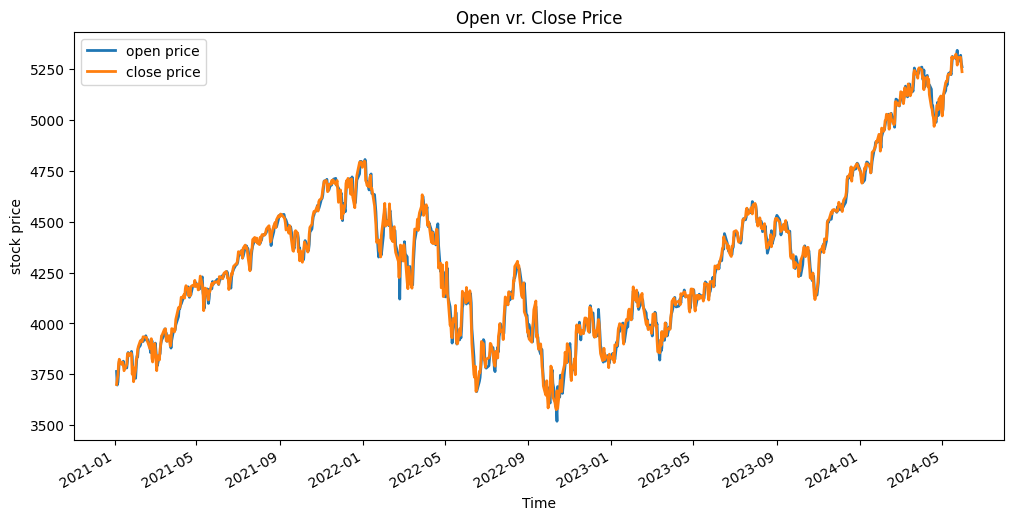

In [ ]:
# plot the open and close prices
plt.subplots(figsize = (12, 6))
df.open.plot(linewidth = 2, label = 'open price')
df['last'].plot(linewidth = 2, label = 'close price')
plt.legend()
plt.ylabel('stock price')
plt.title('Open vr. Close Price')
plt.legend()
plt.show()

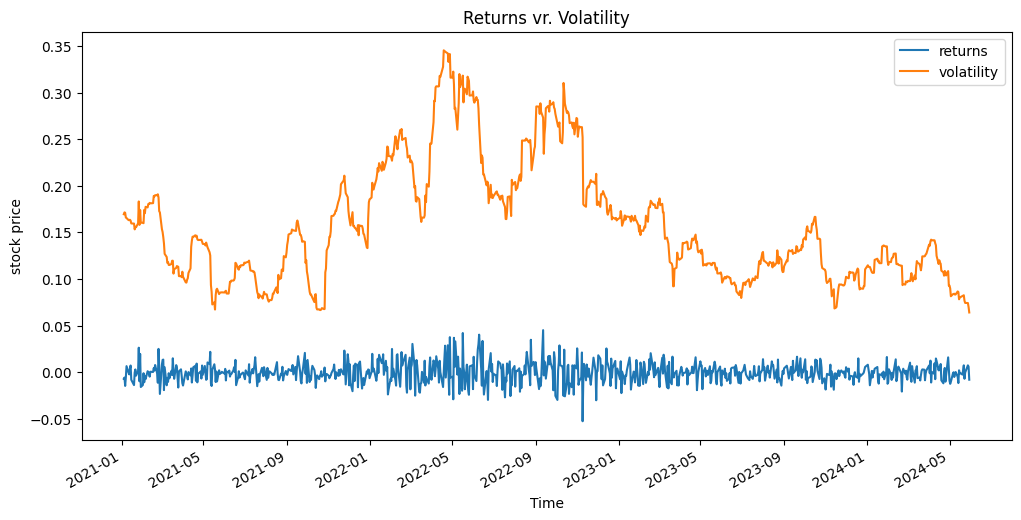

In [ ]:
# plot volatility vr returns
plt.subplots(figsize = (12, 6))
df.returns.plot(label = 'returns')
df.volatility.plot(label = 'volatility')
plt.ylabel('stock price')
plt.title('Returns vr. Volatility')
plt.legend()
plt.show()

# Preprocess the dataset for modeling

In [ ]:
# check for missing values
df.isnull().sum()

,0
open,0
high,0
low,0
last,0
returns,0
volatility,0


In [ ]:
# check for duplicates
df.duplicated().sum()

0

In [ ]:
# drop all the other columns except volatility
df.drop(['open', 'high', 'low', 'last', 'returns'], axis=1, inplace=True)
df.head()

,volatility
Time,
2021-01-04,0.169538
2021-01-05,0.171512
2021-01-06,0.171107
2021-01-07,0.165940
2021-01-08,0.165438


In [ ]:
# save the volatility data
df.to_csv('volatility.csv')
print('Dataset saved successfully!')

Dataset saved successfully!


In [ ]:
# import it
data = pd.read_csv('volatility.csv')
data = data.set_index('Time')
data.head()

,volatility
Time,
2021-01-04,0.169538
2021-01-05,0.171512
2021-01-06,0.171107
2021-01-07,0.165940
2021-01-08,0.165438


In [ ]:
data.tail()

,volatility
Time,
2024-05-23,0.076733
2024-05-24,0.074386
2024-05-28,0.074280
2024-05-29,0.069993
2024-05-30,0.064146


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Function to check stationarity using the Augmented Dickey-Fuller test
def check_stationarity(ts):
    result = adfuller(ts)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')
    return result[1] < 0.05

In [ ]:
check_stationarity(data)

ADF Statistic: -1.2044693628334204
p-value: 0.6716701558239261
Critical Value (1%): -3.4382057088878644
Critical Value (5%): -2.865007578546518
Critical Value (10%): -2.5686164240381513


False

The dataset is not stationary so we need to difference it to achieve stationarity.

In [ ]:
# difference the dataset
ts_diff = data.diff().dropna()

# check stationarity
check_stationarity(ts_diff)

ADF Statistic: -10.521796217833478
p-value: 9.640233033923556e-19
Critical Value (1%): -3.4382057088878644
Critical Value (5%): -2.865007578546518
Critical Value (10%): -2.5686164240381513


True

The dataset is now stationary. We can now we can proceed to build the models.

In [ ]:
# split the dataset for training and testing
threshold = int(len(data) * .8)
train_set = data[:threshold]
test_set = data[threshold:]

print('Train set shape:', train_set.shape)
print('Test set shape:', test_set.shape)

Train set shape: (685, 1)
Test set shape: (172, 1)


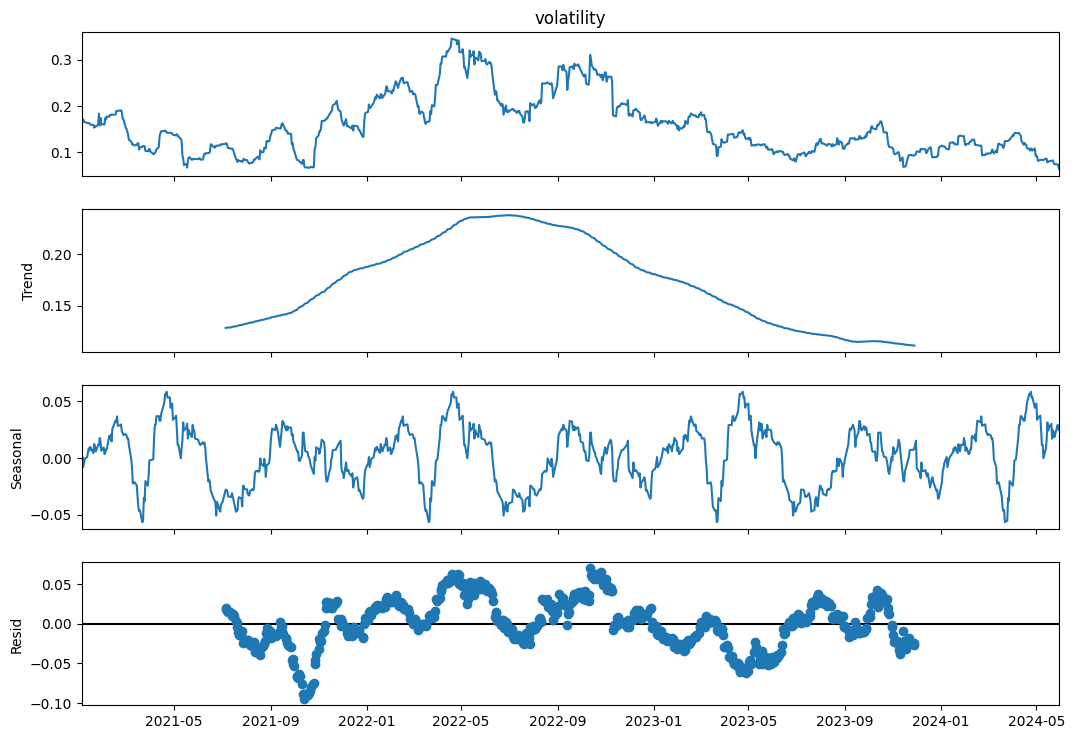

In [ ]:
# File: decompose_time_series.py

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load the Data
# Replace 'your_dataset.csv' with your actual file path
# Ensure that your data has a datetime index
data = pd.read_csv('volatility.csv', index_col='Time', parse_dates=True)

# Step 2: Decompose the Time Series
# We'll use additive model, but you can change it to 'multiplicative' if required
decomposition = seasonal_decompose(data['volatility'], model='additive', period=252)

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

We can see volatility has some seasonal patterns. That is interesting to know. We can further explore the factors leading to this.

# **Build ARCH model**

In [ ]:
# install arch library
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 12.0 MB/s eta 0:00:00


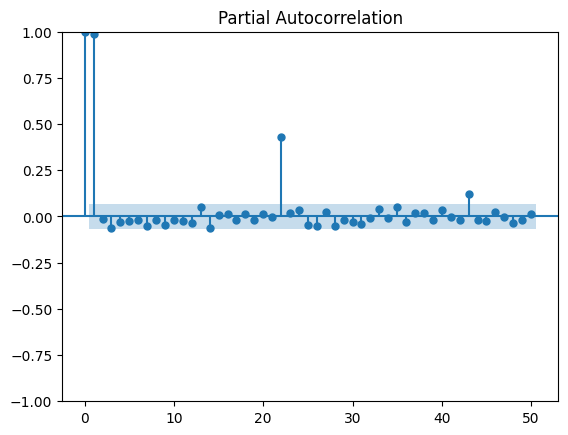

In [ ]:
# plot PACF plot to determine the order of the ARCH models
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_pacf(data, lags=50)
plt.show()

In [ ]:
# build ARCH model for volatility
from arch import arch_model

In [ ]:
# Fit the ARCH(1) model
arch_model_instance1 = arch_model(data, vol='ARCH', p=1)
arch_fitted = arch_model_instance1.fit(disp='off')
print(arch_fitted.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:             volatility   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                1568.83
Distribution:                  Normal   AIC:                          -3131.65
Method:            Maximum Likelihood   BIC:                          -3117.39
                                        No. Observations:                  857
Date:                Mon, Aug 05 2024   Df Residuals:                      856
Time:                        08:01:37   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1229  1.999e-03     61.481      0.000 [  0.119,  0.12

In [ ]:
# Fit ARCH(2) model
arch_model_instance2 = arch_model(data, vol='ARCH', p=2)
arch_fitted = arch_model_instance2.fit(disp='off')
print(arch_fitted.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:             volatility   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                1570.96
Distribution:                  Normal   AIC:                          -3133.91
Method:            Maximum Likelihood   BIC:                          -3114.90
                                        No. Observations:                  857
Date:                Mon, Aug 05 2024   Df Residuals:                      856
Time:                        08:01:37   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1225  1.928e-03     63.538      0.000 [  0.119,  0.12

In [ ]:
# Fit ARCH(3) model
arch_model_instance3 = arch_model(data.volatility.diff().dropna(), vol = "ARCH", p = 3)
arch_fitted = arch_model_instance3.fit(disp = 'off')
print(arch_fitted.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:             volatility   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                2870.00
Distribution:                  Normal   AIC:                          -5730.00
Method:            Maximum Likelihood   BIC:                          -5706.24
                                        No. Observations:                  856
Date:                Mon, Aug 05 2024   Df Residuals:                      855
Time:                        08:01:37   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -6.6684e-05  2.964e-04     -0.225      0.

The best `ARCH` model is between `ARCH(1)` and `ARCH(2)`. However, further exploration can be used to determine the better one between the two.

# **Build GARCH models**

In [ ]:
# build GARCH(1,1) model
garch_model_instance1 = arch_model(data, vol='GARCH', p=1, q=1)
garch_fitted = garch_model_instance1.fit(disp='off')
print(garch_fitted.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             volatility   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1539.59
Distribution:                  Normal   AIC:                          -3071.18
Method:            Maximum Likelihood   BIC:                          -3052.16
                                        No. Observations:                  857
Date:                Mon, Aug 05 2024   Df Residuals:                      856
Time:                        08:01:37   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1224  1.887e-03     64.858      0.000 [  0.119,  0.12

In [ ]:
# build GARCH(1,2)
garch_model_instance2 = arch_model(data.diff().dropna(), vol='GARCH', p=1, q=2)
garch_fitted = garch_model_instance2.fit(disp='off')
print(garch_fitted.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             volatility   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2906.33
Distribution:                  Normal   AIC:                          -5802.66
Method:            Maximum Likelihood   BIC:                          -5778.90
                                        No. Observations:                  856
Date:                Mon, Aug 05 2024   Df Residuals:                      855
Time:                        08:01:37   Df Model:                            1
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
mu         -1.2930e-04  2.317e-05     -5.581  2.3

In [ ]:
# build GARCH(2,2) model
garch_model_instance3 = arch_model(data, vol='GARCH', p=2, q=2)
garch_fitted = garch_model_instance3.fit(disp='off')
print(garch_fitted.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             volatility   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1519.78
Distribution:                  Normal   AIC:                          -3027.56
Method:            Maximum Likelihood   BIC:                          -2999.04
                                        No. Observations:                  857
Date:                Mon, Aug 05 2024   Df Residuals:                      856
Time:                        08:01:37   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1219  1.857e-03     65.658      0.000 [  0.118,  0.12

It seems quite obvious that `GARCH(1,1)` is the best model. We will investigate further to confirm that.

# **Build RNN model**

In [ ]:
# build RNN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(data.shape[1], 1)))
model.add(Dropout(0.2))
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 50)               │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,400 (40.62 KB)

 Trainable params: 10,400 (40.62 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 21  # daily data with a 1-month window
X, y = create_sequences(scaled_data, seq_length)

In [ ]:
print(X.shape)
print(y.shape)

(836, 21, 1)
(836, 1)


In [ ]:
# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 21, 1)
(168, 21, 1)
(668, 1)
(168, 1)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/mean_squared_error/sub defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-41-b35e11e99aa4>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 357, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 325, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 609, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 645, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 43, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1286, in mean_squared_error

Incompatible shapes: [32,1] vs. [32,21,50]
	 [[{{node compile_loss/mean_squared_error/sub}}]] [Op:__inference_one_step_on_iterator_1847]

In [ ]:
# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 30
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(661, 30, 1)
(166, 30, 1)
(661, 1)
(166, 1)


In [ ]:
# Step 3: Build RNN Model
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define the RNN model
rnn_model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    SimpleRNN(50),
    Dense(1)
])

rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
rnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 30, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 4: Train RNN Model
rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - loss: 0.2157 - val_loss: 0.0260
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0143 - val_loss: 0.0017
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0049 - val_loss: 0.0010
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - val_loss: 8.4086e-04
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0034 - val_loss: 0.0013
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0034 - val_loss: 7.7413e-04
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0031 - val_loss: 8.4158e-04
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0026 - val_loss: 7.7452e-04
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0021 - val_loss: 6.9771e-04
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0019 - val_loss: 8.7692e-04
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Build LSTM Model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    #Dropout(0.2),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
lstm_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 30, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train LSTM Model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 0.1202 - val_loss: 0.0030
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0189 - val_loss: 0.0035
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0153 - val_loss: 0.0021
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0125 - val_loss: 0.0023
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0114 - val_loss: 0.0033
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0113 - val_loss: 0.0019
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0083 - val_loss: 0.0021
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0068 - val_loss: 0.0016
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0076 - val_loss: 0.0020
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0067 - val_loss: 0.0020
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0060 - val_loss: 0.0011
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.

In [ ]:
# Build a function to evaluate the Models
def evaluate_model(model, X_test, y_test):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
    r2 = r2_score(y_test, predictions)

    return mae, mape, mse, r2

In [ ]:
# Evaluate RNN Model
rnn_mae, rnn_mape, rnn_mse, rnn_r2 = evaluate_model(rnn_model, X_test, y_test)
print(f'RNN Model - MAE: {rnn_mae}, MAPE: {rnn_mape}, MSE: {rnn_mse}, R2: {rnn_r2}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
RNN Model - MAE: 0.009596563768708733, MAPE: 9.216756035501886, MSE: 0.0001295373143466567, R2: 0.7341986695282732


In [ ]:
# Evaluate LSTM Model
lstm_mae, lstm_mape, lstm_mse, lstm_r2 = evaluate_model(lstm_model, X_test, y_test)
print(f'LSTM Model - MAE: {lstm_mae}, MAPE: {lstm_mape}, MSE: {lstm_mse}, R2: {lstm_r2}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step
LSTM Model - MAE: 0.008470840614208257, MAPE: 8.082271869004382, MSE: 0.0001079384076364455, R2: 0.7785180856692101
